# **Project 2: Implementing Simple Linear Regression with Ordinary Least Squares (OLS) and Sum of Squared Errors (SSE) equations**

## **Objective**
In this assignment, you will implement simple linear regression from scratch using only NumPy and base Python. You will:

- Express linear regression in **matrix notation**.
- Compute the **line of best fit** using **OLS**.
- Calculate the **sum of squared errors (SSE)** to evaluate the model.

By the end of this assignment, you will understand how to derive and implement **linear regression** in its fundamental mathematical form.

---

## **Background**

### **Linear Regression Equation**
Simple linear regression is expressed as:


\begin{equation}
y = mx + b
\end{equation}


where:
- \( y \) is the **dependent variable** (target),
- \( x \) is the **independent variable** (feature),
- \( m \) is the **slope** (coefficient),
- \( b \) is the **y-intercept**.

---

### **Matrix Form**
We can express the equation in **matrix notation**:

\begin{equation}
Y = X \beta
\end{equation}

where:
- \$ Y \$ is an \$ n \times 1 \$ vector of observed values:

  \begin{aligned}
  Y =
  \begin{bmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
  \end{bmatrix}
  \end{aligned}

- \$ X \$ is an \$ n \times 2 \$ **design matrix**, where the first column consists of ones (for the intercept) and the second column contains the \$ x \$ values:

  \begin{aligned}
  X =
  \begin{bmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_n
  \end{bmatrix}
  \end{aligned}

- \$ \beta \$ is a \$ 2 \times 1 \$ vector containing the intercept \$( b \$) and slope \$( m \$):

  \begin{aligned}
  \beta =
  \begin{bmatrix}
  b \\
  m
  \end{bmatrix}
  \end{aligned}

Thus, our model can be rewritten as:

\begin{aligned}
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
&=
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
b \\
m
\end{bmatrix}
\end{aligned}

---

### **Computing the Best Fit Line Using the ordinary least squares (OLS)**
The **best fit line** is obtained using the **ordinary least squares (OLS)**:

\begin{equation}
\beta = (X^T X)^{-1} X^T Y
\end{equation}

where:
- \$ X^T \$ is the transpose of \$ X \$,
- \$ (X^T X)^{-1} \$ is the **inverse** of \$ X^T X \$,
- \$ X^T Y \$ is the product of the transposed \$ X \$ and \$ Y \$.
---

### **Sum of Squared Errors (SSE)**
The **sum of squared errors (SSE)** is used to measure how well the regression line fits the data:

\begin{equation}
SSE = \sum_{i=1}^{n} ||y_i - \hat{y}_i||^2
\end{equation}

where:
- \$ y_i \$ represents the actual observed values,
- \$ \hat{y}_i \$ are the predicted values from the model.

Alternatively, using matrix notation:

\begin{equation}
SSE = (Y - X \beta)^T (Y - X \beta)
\end{equation}

where \$ Y - X\beta \$ represents the **residuals** (differences between actual and predicted values).

---

### **Coding**


###1. Import Required Libraries
For this lab only use NumPy, Pandas, Matplotlib, and base Python.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###2. Data

* We have a data set that describes 506 suburbs in Boston. Find the documentation for the variables [here](https://islp.readthedocs.io/en/latest/datasets/Boston.html).
* *Goal*: Predict the median value (in $1000s) of houses owned in that suburb.
* *Task*: Use the covariates / indepednent variables from the data set to create 3 different types of predictive models: single variable, multivariable, and polynomial regression.

**First step: import the data, split into x and y, and turn them into numpy arrays.**

In [81]:
#https://islp.readthedocs.io/en/latest/datasets/Boston.html
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/intro-stat-learning/ISLP/refs/heads/main/ISLP/data/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [82]:
# remove the last column because we cannot use the dependent variable in the model
x = df.iloc[:, :-1]
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


**Begin with a single variable model, selecting the 6th column: 'rm' (average number of rooms per dwelling)**

In [83]:
# Starting with single linear regression
x = df.iloc[:, 5:6]
x.head()

,rm
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


**Select the target variable that we want to predict: medv (median value of owner-occupied homes in $1000s)**

In [84]:
y = df.iloc[:, -1:]
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


**Turn both data frame objects into numpy arrays.**

In [85]:
x = x.to_numpy()

In [86]:
y = y.to_numpy()

###3. Prepare Data in Matrix Form

#### 3a. Convert 𝑥 into matrix form by adding a column of ones for the intercept.

In [87]:
def prepare_matrix(x):
    n = len(x)
    X = np.column_stack((np.ones(n), x))  # Shape (n, 2)
    return X

X = prepare_matrix(x)
Y = y.reshape(-1, 1)  # Reshape y to column vector (aka. nx1 matrix)

#### 3b. Standardize the data. **(2 points)**

In [88]:
# insert your code for standardizing the data
# **remember that currently, your x varaible is just the rm column, when you do question 7 and and after, make sure every non-label column you use is also standardized**

X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])


#### 3c. *Why do we add a column of ones to the 𝑋 matrix?*  **(2 points)**

**Answer:**
Because we don't want the intercept to be altered during matrix multiplication and the column of ones in X matrix corresponds to the intercept during multiplication to keep the intercept the same.

#### 3d. *Why do we need to standardize our data for linear regression?*  **(2 points)**
**Answer:**
To ensure that all the features contribute equally by measuring them on the same scale.

#### 3e. *Why do we only standardize the 𝑋 matrix?* **(2 points)**
**Answer:**
X matrix is the independent variable and Y is the dependent variable. We don't standardize the dependent variable because it is what we're trying to understand. Standardizing its scale will remove the meaningful scale of the target variable.

### 4. Compute the Best Fit Line Using OLS
#### 4a. Use the formula for Ordinary Least Squares (OLS) Regression to compute the $\beta$ vector. (Hint: Review Lab 4) **(2 points)**

In [89]:
# Compute beta vector
betas = np.linalg.inv(X.T @ X) @ X.T @ y

print(betas)

[[22.53280632]
 [ 6.38897522]]


#### 4b. *Explain how OLS finds the line of best fit.* **(2 points)**

**Answer:**
OLS finds the line of the best fit by minimizing the sum of the squared distances between the data points and the data. The goal is to find a line that is as close to all the data points as possible -- which means the sum of the squared distances as close to 0 as possible

###5. Using your computed values for $\beta$, generate the predicted values for the training data.
#### 5a. Use the computed $\beta$ to find the predictions ($\hat{Y}$) using matrix multiplication with the design matrix X. **(2 points)**

In [90]:
# Create variable Y_pred (a list of predictions for each suburb)

Y_pred = X @ betas
Y_pred

array([[25.17574577],
       [23.77402099],
       [30.72803225],
       [29.02593787],
       [30.38215211],
       [23.85593997],
       [20.05125842],
       [21.50759586],
       [16.5833549 ],
       [19.97844155],
       [23.3735282 ],
       [20.02395209],
       [18.93169901],
       [19.47782555],
       [20.81583557],
       [18.43108302],
       [19.35039603],
       [19.85101202],
       [14.99048582],
       [17.45715736],
       [16.02812625],
       [19.6234593 ],
       [21.23453259],
       [18.23993873],
       [19.25027283],
       [16.29208741],
       [18.23993873],
       [20.36983223],
       [24.44757706],
       [26.07685456],
       [17.32972783],
       [20.59738496],
       [19.48692766],
       [17.22050253],
       [20.81583557],
       [19.33219181],
       [18.49479778],
       [18.57671676],
       [19.63256141],
       [25.35778795],
       [29.26259271],
       [26.95065703],
       [21.48028953],
       [21.86257811],
       [20.57007863],
       [17

#### *5b. What does the y_pred array respresent?* **(2 points)**


**Answer:**
y_pred represents the predicted median home values using the linear regression model. In other words, it predicts the y value (which is a point on the best fit line) based on the given x value (rm - explanatory var).

### 6. Calculate the Sum of Squared Errors (SSE) for the model.
#### 6a. Compute the SSE to measure how well the regression model fits the training data. **(2 points)**

In [91]:
# Compute the SSE, creating the variable sse

sse = np.sum((y - Y_pred) ** 2)
sse

22061.879196211798

#### *6b. How does SSE relate to the goodness of fit of the model? In other words, what do we want SSE to be?* **(2 points)**

SSE shows us the total squared difference between the actual and predicted values.
We want the SSE to be as close to 0 as possible. The computed SSE is not that accurate since the value is high. However, we don't want it to be exactly 0 because that would mean that it suggests overfitting. Hence, the smaller the SSE, the better performance indication for our model.

**Answer:**

### 7. Visualize the resulting regression model and line of best fit. Plot the data alongside the line of best fit.

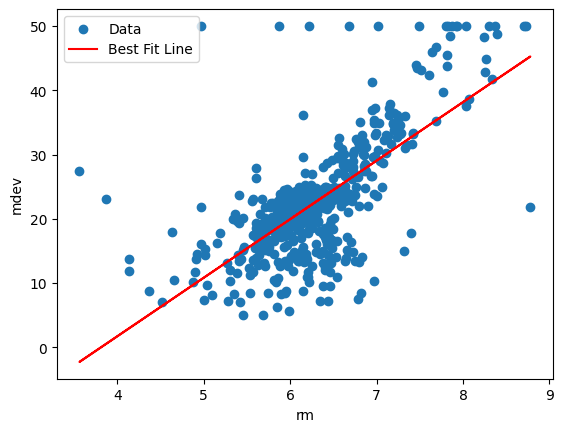

In [92]:
plt.scatter(x, y, label="Data")
plt.plot(x, Y_pred, color='red', label="Best Fit Line")
plt.xlabel("rm")
plt.ylabel("mdev")
plt.legend()
plt.show()

### 8. The above plot looks at the relationship between *rm* (an independent variable) and *mdev* (the dependent variable we are trying to predict). Create a single ordinary least squares (OLS) regression with a different independent variable (other than *rm*) from our data set. Once you have your predictions, plot the line of best fit with your chosen independent variable on the x-axis and *mdev* on the y-axis. **(2 points)**

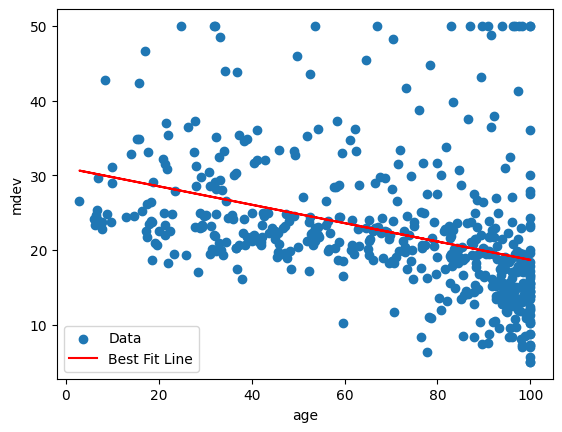

In [93]:
### implement your sin
#with age
new_x = df.iloc[:, 6:7]

new_x = new_x.to_numpy()

new_X = prepare_matrix(new_x)

new_X[:, 1] = (new_X[:, 1] - np.mean(new_X[:, 1])) / np.std(new_X[:, 1])

betas = np.linalg.inv(new_X.T @ new_X) @ new_X.T @ y

Y_newpred = new_X @ betas

plt.scatter(new_x, y, label="Data")
plt.plot(new_x, Y_newpred, color='red', label="Best Fit Line")
plt.xlabel("age")
plt.ylabel("mdev")
plt.legend()
plt.show()


### 9. To this point, you've trained a single variable linear regression on just the training data. This tells us how the model will perform on data we already have, but not on actual data we recieve in the future. To get a better understanding of how the data will run on unseen data, we need to split our data into training and testing data. Now, train a single linear regression model using a train/test split. Identify how the mdoel does on the training vs testing data.

#### 9a. Split the data into a training and test split. In the training set, keep 80% of the observations. In the test set, keep the other 20% of observations. **(2 points)**

In [94]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=90)


#### 9b. With your training data, train the model by minimizing the Sum of Squared Errors (SSE). You will have one coefficient for the intercept term $(\beta_0)$ and another for your chosen independent variable ($\beta_1$). **(10 points)**

In [95]:
# Create and train the model
X_train1 = prepare_matrix(X_train)
X_test1 = prepare_matrix(X_test)
#standardize train
X_train1[:, 1] = (X_train1[:, 1] - np.mean(X_train1[:, 1])) / np.std(X_train1[:, 1])
#standardize test
X_test1[:, 1] = (X_test1[:, 1] - np.mean(X_test1[:, 1])) / np.std(X_test1[:, 1])
betas = np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T @ y_train
print('Betas: ', betas)


Betas:  [[22.65990099]
 [-3.82631995]]


#### 9c. Using your trained model ($\beta$ coefficients), calculate your predictions on the training data set. Compare your predictions with the true values of *mdev* in the train set by computing the SSE. Report your value of SSE. **(5 points)**

In [96]:
# Test your trained model on your training data (What is your SSE?)
# Train model (minimize the SSE)
preds = X_train1 @ betas
m1_mse = (np.sum((y_train - preds)**2))/len(y_train)
print(m1_mse)

68.683410277248


#### 9d. Now use your trained model to calculate your predictions on the test data set. Compute the SSE on the test data set. **(5 points)**

In [97]:
# Test your trained model on your test data (What is your SSE?)
y_predtest = X_test1 @ betas
testmse = (np.sum((y_test - y_predtest) ** 2))/len(y_test)
print(testmse)

88.1168778007387


#### 9e. How does the SSE on the test set compare to the SSE on the training set? **(2 points)**

**Answer:**

The MSE in the test set is higher than the MSE in the training set. This is because our model was trained specifically on the data of the training set, and we then tested out model on the unseen data of the testing set, resulting in a higher MSE. This is expected.

### 9f. Plot (like in Question 7) your line of best fit over your training data. **(2 points)**

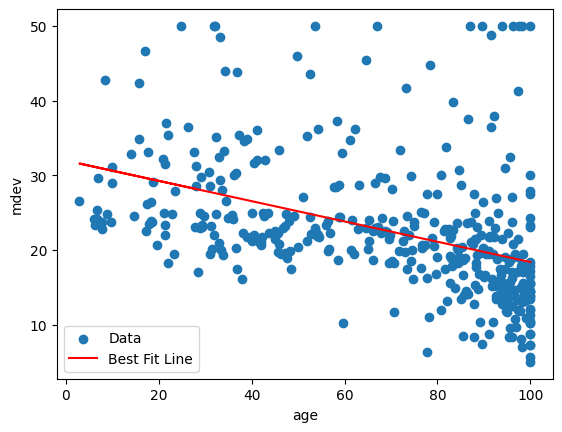

In [98]:
# Change back to numpy
# Plot here
plt.scatter(X_train, y_train, label="Data")
plt.plot(X_train, preds, color='red', label="Best Fit Line")
plt.xlabel("age")
plt.ylabel("mdev")
plt.legend()
plt.show()

### 9g. Plot (like in Question 7) your line of best fit over your test data. **(2 points)**

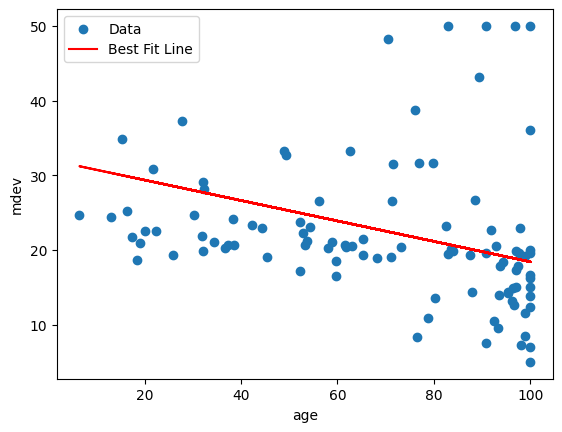

In [99]:
# Plot here
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_predtest, color='red', label="Best Fit Line")
plt.xlabel("age")
plt.ylabel("mdev")
plt.legend()
plt.show()

### 10. The models you have created thus far are only examples of single ordinary least squares. What if we want to include more than one independent variable in our prediction? Train a multiple linear regression model which incorporates all of the available independent variables in the data set. Using your model, predict the median house value. Compare your results on the training data set vs the test data set again. **(10 points)**

In [100]:
### Modify your code for multiple linear regression (use all non-label columns available to train a model to predict median house value)

X1 = df.iloc[:, :-1]
y = df.iloc[:, -1:]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y, test_size=0.2,random_state=42)

X_train3 = prepare_matrix(X_train2)
X_test3 = prepare_matrix(X_test2)
y_train3 = y_train2.to_numpy()
y_test3 = y_test2.to_numpy()

#standardize train
X_train3[:, 1] = (X_train3[:, 1] - np.mean(X_train3[:, 1])) / np.std(X_train3[:, 1])
#standardize test
X_test3[:, 1] = (X_test3[:, 1] - np.mean(X_test3[:, 1])) / np.std(X_test3[:, 1])

betas = np.linalg.inv(X_train3.T @ X_train3) @ X_train3.T @ y_train3
print('Betas: ', betas)

# Train model (minimize the MSE)
preds = X_train3 @ betas
m1_mse = (np.sum((y_train3 - preds)**2))/len(y_train3)
print('Train: ', m1_mse)

y_predtest = X_test3 @ betas
testmse = (np.sum((y_test3 - y_predtest) ** 2))/len(y_test3)
print('Test: ', testmse)
#
#The MSE in the training set is still smaller than the testing set, which is expected as we trained our model based on the training set.

Betas:  [[ 3.65114031e+01]
 [-1.12747328e+00]
 [ 3.07954889e-02]
 [ 2.52477064e-02]
 [ 3.04947682e+00]
 [-1.81832461e+01]
 [ 4.24009781e+00]
 [-3.59439826e-03]
 [-1.46550703e+00]
 [ 2.39990397e-01]
 [-1.12752436e-02]
 [-8.94844726e-01]
 [-5.37770202e-01]]
Train:  22.60428647941742
Test:  23.136808298390335


### 11. The model you made in the previous question only had linear terms of our features. Sometimes, we want to capture more complicated relationships between variables. To add more complexity to our model, experiment with differnet polynomial models. For each model, try to think about whether you may be overfitting or underfitting to the training data. Again, compare your performnance on the training data vs the testing data.

#### 11a. Modify the design matrix to include polynomial terms of degree 2. (Hint: add squared values of existing columns to the deign matrix X). Calculate the SSE on the training and testing data sets. **(10 points)**

In [101]:
### Modify for polynomial regression (degree 2); with rm
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=49)

#make into a matrix
X_train= prepare_matrix(X_train)
X_test= prepare_matrix(X_test)

X_train = np.column_stack(
    [
        X_train,
        X_train[:, 1]**2
    ]
)

X_test = np.column_stack(
    [
        X_test,
        X_test[:, 1]**2
    ]
)
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()

betas = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train1
print('Betas: ', betas)

# Train model (minimize the SSE)
preds = X_train @ betas
trainmse2 = (np.sum((y_train1 - preds)**2))/len(y_train1)
print('Train: ', trainmse2)

y_predtest = X_test @ betas
testmse2 = (np.sum((y_test1 - y_predtest) ** 2))/len(y_test1)
print('Test: ', testmse2)


Betas:  [[ 64.78379951]
 [-22.20276184]
 [  2.43279515]]
Train:  37.465226671168885
Test:  40.731857127494926


#### 11b. To test how our model performs as we change the degree of our model. Train models of degree 1 to degree 8. This will result in 8 different models.  For each model you create, save the Sum of Squared Errors (SSE) on the training and test data set respectively. We will use them for the next step to plot how they change as the model becomes more complex. **(20 points)**

In [102]:
#11b (updated)
### Modify for polynomial regression (degree 2); with rm

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=39) #39
X_train_base= prepare_matrix(X_train)
X_test_base= prepare_matrix(X_test)
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()
train_var = []
test_var = []



for degree in range(1, 9):
  #make into a matrix
  X_train = X_train_base.copy()  # Reset X_train
  X_test = X_test_base.copy()  # Reset X_test

  for deg in range (2, degree + 1):
    X_train = np.column_stack(
      [
          X_train,
          X_train[:, 1]**deg
      ]
    )

    X_test = np.column_stack(
        [
            X_test,
            X_test[:, 1]**deg
        ]
    )
  mean = np.mean(X_train[:, 1:], axis = 0)
  std = np.std(X_train[:, 1:], axis = 0)
  X_train[:, 1:] = (X_train[:, 1:] - mean) / std
  X_test[:, 1:] = (X_test[:, 1:] - mean) / std


  betas = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train1
  # Train model (minimize the MSE)
  preds = X_train @ betas
  trainmse2 = (np.sum((y_train1 - preds)**2))/len(y_train1)
  train_var.append(trainmse2)
  print(degree, 'Train: ', trainmse2)

  y_predtest = X_test @ betas
  testmse2 = (np.sum((y_test1 - y_predtest) ** 2))/len(y_test1)
  test_var.append(testmse2)
  print(degree, 'Test: ', testmse2)

1 Train:  39.91262010356654
1 Test:  58.26639570074366
2 Train:  34.64243475326773
2 Test:  51.97055928755687
3 Train:  33.344143321215284
3 Test:  51.71705337066626
4 Train:  32.27435605515709
4 Test:  51.15306212084223
5 Train:  29.86825055332046
5 Test:  53.96557661601726
6 Train:  29.8404141257599
6 Test:  54.104960398509206
7 Train:  29.42441839697405
7 Test:  56.79449435948038
8 Train:  29.448879421347083
8 Test:  56.67223584291784


### Overfitting

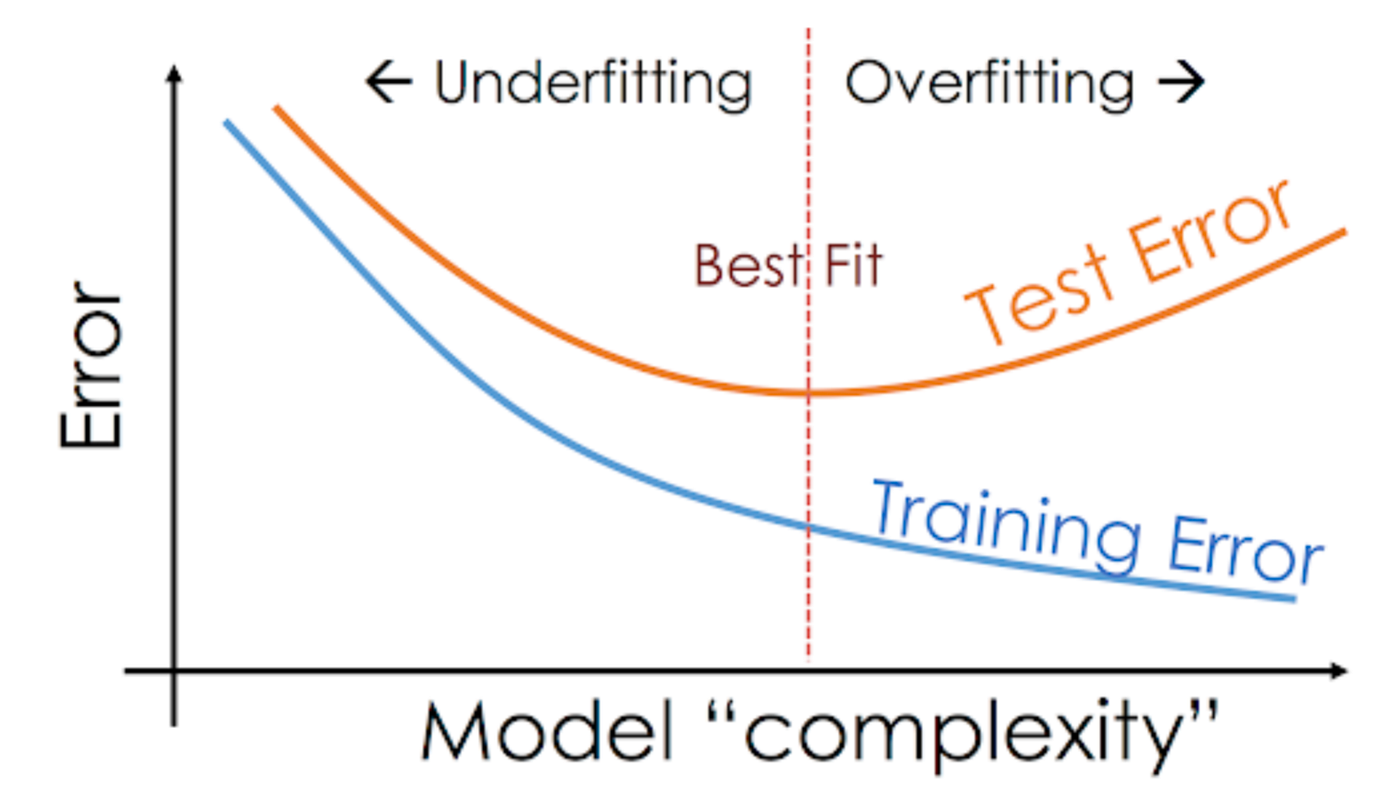

#### 11c. Using the training and testing SSE you calculated in the previous question, plot the errors for each model complexity. In this plot, the x-axis will be the model complexity (degree of the model) and the y-axis will be the SSE you calculated. What can you determine from this plot? How does the error on the training data set compare to the error on the testing data set as the degree of the model increases? **(10 points)**

[39.91262010356654, 34.64243475326773, 33.344143321215284, 32.27435605515709, 29.86825055332046, 29.8404141257599, 29.42441839697405, 29.448879421347083]
[58.26639570074366, 51.97055928755687, 51.71705337066626, 51.15306212084223, 53.96557661601726, 54.104960398509206, 56.79449435948038, 56.67223584291784]


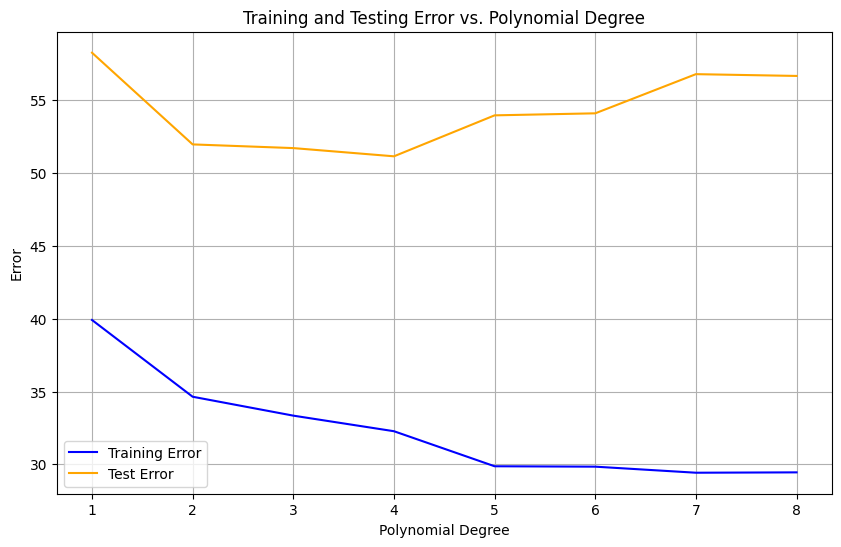

In [103]:
### Graph training and testing errors on same line plot to show overfitting
degree = [1,2,3,4,5,6,7,8]
print(train_var)
print(test_var)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(degree, train_var, label='Training Error', color='blue')
plt.plot(degree, test_var, label='Test Error', color='orange')

# Add labels and legend
plt.title('Training and Testing Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

#From this graph we can look at the relationship between the training and testing error. We can see that the training error is constantly lower
#than the testing error, but also that the training error slowly decreases constantly, while the test error decreases and then goes up after a certain degree.
#As the model gets more "complex," the testing error starts to increase. This is because of overfitting due to higher complexity and the model gets too used to the training data.
#Therefore the training error gets significantly lower as the degree increases, while the testing error increases.